<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> Analyzing Call Center Performance </div> -->



<h1 style='background:#0f403f; border:0; color:#ebac8c'><center>CALL CENTER PERFORMANCE TELECOMUNICATION INDUSTRY</center></h1> 

<center>
<img style="align:center;" src="https://www.gaceta.udg.mx/wp-content/uploads/2021/09/10-ventajas-de-contratar-un-call-center.jpg" width=900>
</center>

<!-- <div style="padding:20px; 
            color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500;
            width:1300px;
            height:500px"> TABLE OF CONTENT</div> -->




                      
</div>


<a id='1'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> IMPORTING LIBRARIES</div> -->

<h1 style='background:#0f403f; border:0; color:#ebac8c'><center>IMPORTING LIBRARIES</center></h1> 


In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as tts 


In [4]:
from sklearn.metrics import r2_score

<a id='2'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> LOADING DATASET</div> -->
<h1 style='background:#0f403f; border:0; color:#ebac8c'><center>LOADING DATASET</center></h1> 

In [5]:
ccd = pd.read_csv('Call Center Data.csv')
ccd.head()

df=ccd.copy()
df.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,1,217,204,94.01%,13,0:00:17,0:02:14,0:02:45,76.28%
1,2,200,182,91.00%,18,0:00:20,0:02:22,0:06:55,72.73%
2,3,216,198,91.67%,18,0:00:18,0:02:38,0:03:50,74.30%
3,4,155,145,93.55%,10,0:00:15,0:02:29,0:03:12,79.61%
4,5,37,37,100.00%,0,0:00:03,0:02:06,0:00:35,97.30%


<a id='3'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> DATA DESCRIPTION</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>CALL CENTER DATA DESCRIPTION</center></h1> 


The call center dataset contains **1,251 records** (indexed from 1 to 1,251) with **nine key performance metrics** capturing various aspects of call handling efficiency.

### Dataset Metrics Overview

- **Incoming Calls**  
  Total calls received per record, ranging from **5 to 1,575**, with an average of ~**200 calls**. Extremely high volumes (e.g., 1,575) likely reflect **peak demand periods** or **system anomalies**.

- **Answered Calls**  
  Calls successfully connected, ranging from **5 to 1,218**, averaging about **90% of incoming calls**.

- **Answer Rate**  
  Percentage of answered calls, ranging from **22.10% to 100%**, with most records exceeding **85%**.

- **Abandoned Calls**  
  Calls terminated by the caller before connection, ranging from **0 to 409**. Higher values indicate potential **staffing or technical issues**.

- **Average Answer Speed**  
  Time to answer a call (HH:MM:SS), ranging from **0:00:02 to 0:05:48**, with most entries between **10 and 30 seconds**.

- **Average Talk Duration**  
  Call handling time ranging from **1:30 to 4:48 minutes**, typically **2–3 minutes**.

- **Average Waiting Time**  
  Time callers wait before being answered, ranging from **0:00:03 to 0:25:51**. Long waits suggest **severe bottlenecks**.

- **Service Level (20 Seconds)**  
  Percentage of calls answered within 20 seconds, ranging from **0% to 100%**, typically **70–80%**, with many below the **80% target**.

### Key Insights

- **Performance Variability** – Some records reflect optimal operations (high answer rates, fast response), while others show **severe service gaps** (high abandonment, long waits).
- **Peak Loads** – High call volumes often **increase abandonment rates** and **waiting times**.
- **Service Level Gaps** – Many records fail to meet the **20-second target**, indicating **operational inefficiencies**.

### Recommendations

- Investigate **high abandonment** and **long wait time** records.
- Compare performance across **different time periods** (e.g., by hour/day).
- Analyze correlations between **call volume and service degradation**.
- Explore **staffing, technology, and workflow optimizations** to improve consistency.


<a id='4'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> EXPLORATORY DATA ANALYSIS</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>EXPLORATORY ANALYSIS</center></h1> 

In [6]:
# Basic info
print('Shape of the data:',df.shape)
print("****************************")
print('Columns of the data:',df.columns.tolist())
print("****************************")
print('Number of unique values:',df.nunique())
print("****************************")
print('Number of duplicated values:',df.duplicated().sum())
print("****************************")

Shape of the data: (1251, 9)
****************************
Columns of the data: ['Index', 'Incoming Calls', 'Answered Calls', 'Answer Rate', 'Abandoned Calls', 'Answer Speed (AVG)', 'Talk Duration (AVG)', 'Waiting Time (AVG)', 'Service Level (20 Seconds)']
****************************
Number of unique values: Index                         1251
Incoming Calls                 403
Answered Calls                 363
Answer Rate                    730
Abandoned Calls                115
Answer Speed (AVG)              93
Talk Duration (AVG)            131
Waiting Time (AVG)             424
Service Level (20 Seconds)    1027
dtype: int64
****************************
Number of duplicated values: 0
****************************


In [7]:
df.dtypes

Index                          int64
Incoming Calls                 int64
Answered Calls                 int64
Answer Rate                   object
Abandoned Calls                int64
Answer Speed (AVG)            object
Talk Duration (AVG)           object
Waiting Time (AVG)            object
Service Level (20 Seconds)    object
dtype: object

In [8]:
df.describe()

,Index,Incoming Calls,Answered Calls,Abandoned Calls
count,1251.000000,1251.000000,1251.000000,1251.000000
mean,626.000000,198.539568,176.845723,21.693845
std,361.276902,156.534195,115.612080,59.671955
min,1.000000,5.000000,5.000000,0.000000
25%,313.500000,123.000000,114.000000,3.000000
50%,626.000000,177.000000,166.000000,8.000000
75%,938.500000,233.000000,214.500000,16.000000
max,1251.000000,1575.000000,909.000000,704.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Index                       1251 non-null   int64 
 1   Incoming Calls              1251 non-null   int64 
 2   Answered Calls              1251 non-null   int64 
 3   Answer Rate                 1251 non-null   object
 4   Abandoned Calls             1251 non-null   int64 
 5   Answer Speed (AVG)          1251 non-null   object
 6   Talk Duration (AVG)         1251 non-null   object
 7   Waiting Time (AVG)          1251 non-null   object
 8   Service Level (20 Seconds)  1251 non-null   object
dtypes: int64(4), object(5)
memory usage: 88.1+ KB


In [10]:
#Remove the index
df = df.drop(['Index'], axis=1)
df.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,217,204,94.01%,13,0:00:17,0:02:14,0:02:45,76.28%
1,200,182,91.00%,18,0:00:20,0:02:22,0:06:55,72.73%
2,216,198,91.67%,18,0:00:18,0:02:38,0:03:50,74.30%
3,155,145,93.55%,10,0:00:15,0:02:29,0:03:12,79.61%
4,37,37,100.00%,0,0:00:03,0:02:06,0:00:35,97.30%


<a id='#6'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> MISSING VALUES</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>MISSING VALUES</center></h1> 

In [11]:
# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values[missing_values > 0])
print("****************************")

Missing Values:
 Series([], dtype: int64)
****************************


In [12]:
df.isnull().sum()

Incoming Calls                0
Answered Calls                0
Answer Rate                   0
Abandoned Calls               0
Answer Speed (AVG)            0
Talk Duration (AVG)           0
Waiting Time (AVG)            0
Service Level (20 Seconds)    0
dtype: int64

In [13]:
# show the missing values in dataset with ratio
def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

missing_values_tabl(df)

,n_miss,ratio


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Incoming Calls'),
  Text(1.5, 0, 'Answered Calls'),
  Text(2.5, 0, 'Answer Rate'),
  Text(3.5, 0, 'Abandoned Calls'),
  Text(4.5, 0, 'Answer Speed (AVG)'),
  Text(5.5, 0, 'Talk Duration (AVG)'),
  Text(6.5, 0, 'Waiting Time (AVG)'),
  Text(7.5, 0, 'Service Level (20 Seconds)')])

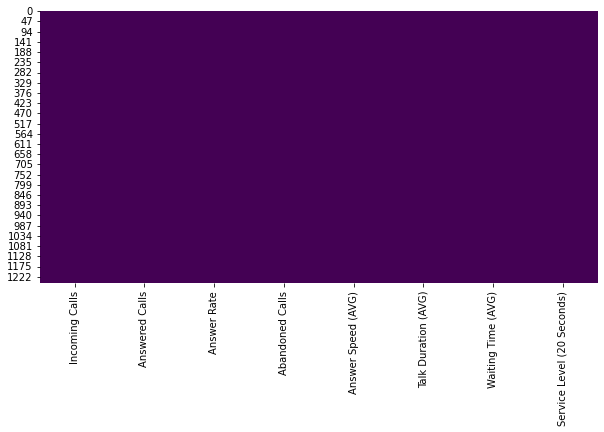

In [14]:
# visualize the missing values with heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.xticks(rotation=90)

In [15]:
# handling the missing values by using KNN imputer
num=df.select_dtypes(include=['float64','int64'])
for i in df.columns:
    if df[i].isnull().sum()>len(df)*0.90:
        df.drop(i,axis=1,inplace=True)
df.isnull().sum()

Incoming Calls                0
Answered Calls                0
Answer Rate                   0
Abandoned Calls               0
Answer Speed (AVG)            0
Talk Duration (AVG)           0
Waiting Time (AVG)            0
Service Level (20 Seconds)    0
dtype: int64

In [16]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=15)
num=df.select_dtypes(include=['float64','int64'])    
for i in num.columns:
   df[i]=knn.fit_transform(df[[i]])
      
df.isnull().sum()

Incoming Calls                0
Answered Calls                0
Answer Rate                   0
Abandoned Calls               0
Answer Speed (AVG)            0
Talk Duration (AVG)           0
Waiting Time (AVG)            0
Service Level (20 Seconds)    0
dtype: int64

<a id='5'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> EXPLOROTORY DATA ANALYSIS (EDA) </div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>EXPLORATORY DATA ANALYSIS (EDA)</center></h1> 

## Data Cleaning & Conversion

To prepare the dataset for correlation analysis:

- **Converted time-based fields** (`Answer Speed (AVG)`, `Talk Duration (AVG)`, `Waiting Time (AVG)`) from **HH:MM:SS** format into **numeric minutes** for statistical calculations.  
- This was done by parsing the time strings into `datetime` objects, converting to `timedelta`, and extracting **total minutes**.  
- **Converted numeric-like object columns** to floats so they could be included in correlation analysis.  
- **Filled missing values** with column medians to avoid data loss and keep correlation results accurate.  

These steps ensure all relevant fields are in a consistent numeric format, enabling **accurate and complete correlation calculations**.


In [17]:
#Data Cleaning & Conversion for Correlation Analysis

# Work on a copy to avoid modifying the original
ccd_time = df.copy()

In [18]:
# Remove % sign from percentage columns before converting
percent_cols = ['Answer Rate', 'Service Level (20 Seconds)']
for col in percent_cols:
    ccd_time[col] = ccd_time[col].astype(str).str.replace('%', '', regex=False).str.strip()



In [19]:
def time_to_minutes(series):
    # Parse times flexibly without specifying strict format
    dt_series = pd.to_datetime(series, errors='coerce')

    # For those parsed, subtract midnight to get timedelta
    timedelta_series = dt_series - pd.to_datetime("00:00:00")

    # Convert timedelta to total minutes, NaT becomes NaN
    return timedelta_series.dt.total_seconds() / 60


In [21]:
# Convert the three time-based columns to float minutes
time_columns = ['Answer Speed (AVG)', 'Talk Duration (AVG)', 'Waiting Time (AVG)']
for col in time_columns:
    ccd_time[col] = time_to_minutes(ccd_time[col])

In [26]:
ccd_time.dtypes

Incoming Calls                float64
Answered Calls                float64
Answer Rate                    object
Abandoned Calls               float64
Answer Speed (AVG)            float64
Talk Duration (AVG)           float64
Waiting Time (AVG)            float64
Service Level (20 Seconds)     object
dtype: object

In [27]:
# Convert any numeric-like object columns to float
for col in ccd_time.columns:
    if ccd_time[col].dtype == 'object':
        ccd_time[col] = pd.to_numeric(ccd_time[col], errors='coerce')

In [29]:
ccd_time.dtypes

Incoming Calls                float64
Answered Calls                float64
Answer Rate                   float64
Abandoned Calls               float64
Answer Speed (AVG)            float64
Talk Duration (AVG)           float64
Waiting Time (AVG)            float64
Service Level (20 Seconds)    float64
dtype: object

In [30]:
# Fill missing values for correlation analysis
ccd_time.fillna(ccd_time.median(), inplace=True)

In [32]:
# Check changes
print(ccd_time.dtypes)
print(ccd_time.head())

Incoming Calls                float64
Answered Calls                float64
Answer Rate                   float64
Abandoned Calls               float64
Answer Speed (AVG)            float64
Talk Duration (AVG)           float64
Waiting Time (AVG)            float64
Service Level (20 Seconds)    float64
dtype: object
   Incoming Calls  Answered Calls  Answer Rate  Abandoned Calls  \
0           217.0           204.0        94.01             13.0   
1           200.0           182.0        91.00             18.0   
2           216.0           198.0        91.67             18.0   
3           155.0           145.0        93.55             10.0   
4            37.0            37.0       100.00              0.0   

   Answer Speed (AVG)  Talk Duration (AVG)  Waiting Time (AVG)  \
0            0.283333             2.233333            2.750000   
1            0.333333             2.366667            6.916667   
2            0.300000             2.633333            3.833333   
3            0.

In [33]:
ccd_time.head()
ccd_time.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,217.000000,204.000000,94.010000,13.000000,0.283333,2.233333,2.750000,76.280000
1,200.000000,182.000000,91.000000,18.000000,0.333333,2.366667,6.916667,72.730000
2,216.000000,198.000000,91.670000,18.000000,0.300000,2.633333,3.833333,74.300000
3,155.000000,145.000000,93.550000,10.000000,0.250000,2.483333,3.200000,79.610000
4,37.000000,37.000000,100.000000,0.000000,0.050000,2.100000,0.583333,97.300000


## Cleaning Percentage Columns

To prepare the dataset for correlation analysis, the `Answer Rate` and `Service Level (20 Seconds)` columns were stored as strings containing a '%' sign.  
These symbols were removed, and the values were converted to **float** type.  
This step ensures these fields can be included in numerical calculations and statistical analysis without errors.


In [34]:
# Convert percentage columns to float

# List of percentage columns to clean
percent_columns = ['Answer Rate', 'Service Level (20 Seconds)']

for col in percent_columns:
    # Remove % sign and any extra spaces, handle missing values
    ccd_time[col] = (
        ccd_time[col]
        .astype(str)                       # ensure it's string for replace
        .str.replace('%', '', regex=False) # remove % sign
        .str.strip()                        # remove spaces
    )
    # Convert to float
    ccd_time[col] = pd.to_numeric(ccd_time[col], errors='coerce')

# Validation
ccd_time.dtypes


Incoming Calls                float64
Answered Calls                float64
Answer Rate                   float64
Abandoned Calls               float64
Answer Speed (AVG)            float64
Talk Duration (AVG)           float64
Waiting Time (AVG)            float64
Service Level (20 Seconds)    float64
dtype: object

## Checking for Missing Values

Before performing any analysis, it’s essential to verify if the dataset contains any missing or null values.  
This helps ensure the accuracy of subsequent visualizations and models, as missing data can bias results or cause errors.


In [35]:
# Check for missing values
null_counts = ccd_time.isnull().sum()
print("Null values in each column:\n", null_counts)

# Since no nulls, proceed with visualization

Null values in each column:
 Incoming Calls                0
Answered Calls                0
Answer Rate                   0
Abandoned Calls               0
Answer Speed (AVG)            0
Talk Duration (AVG)           0
Waiting Time (AVG)            0
Service Level (20 Seconds)    0
dtype: int64


<a id='12'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">VIZ</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>VISUALIZATION</center></h1> 

## 2. Distribution of Call Center Metrics

Histograms provide a high-level overview of the distributions of key call center performance metrics.  
They help identify how incoming call volumes and other fields are grouped, detect skewness, and spot outliers or unusual patterns.


In [36]:
# Set plot style
plt.style.use('grayscale')

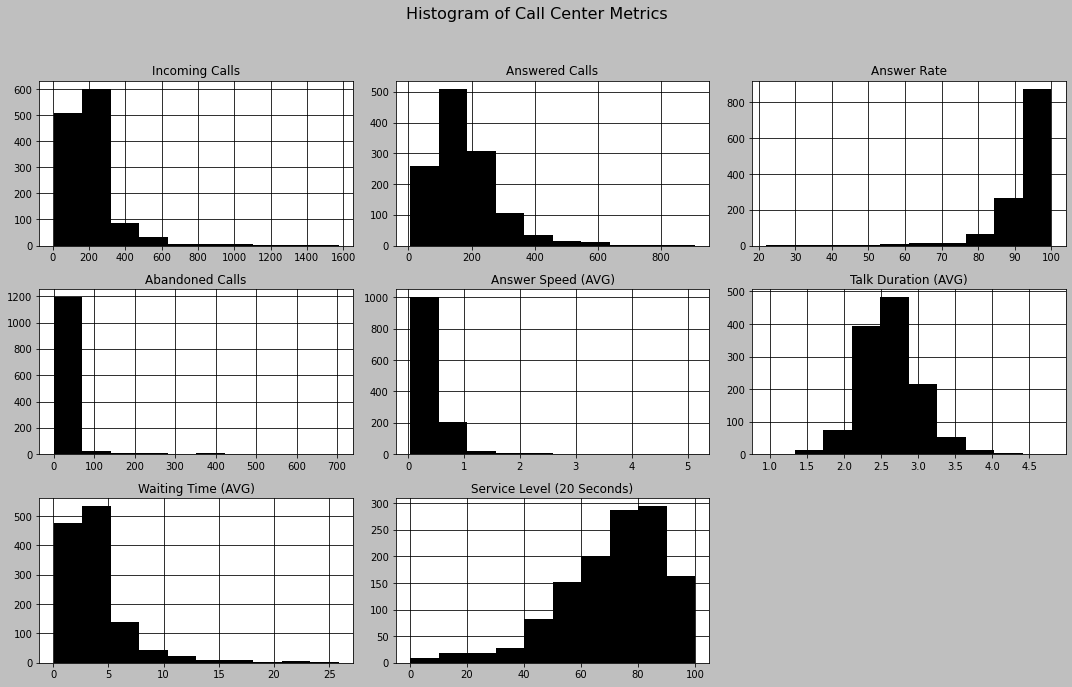

In [37]:
# Histograms to visualize distributions of all numerical fields
ccd_time.hist(figsize=(15,10))
plt.suptitle('Histogram of Call Center Metrics', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 3. Correlation Analysis via Heatmap

A correlation heatmap visualizes pairwise relationships between numeric fields.  
It highlights how strongly different metrics like wait time, call volume, and abandonment relate to each other, guiding deeper analysis.


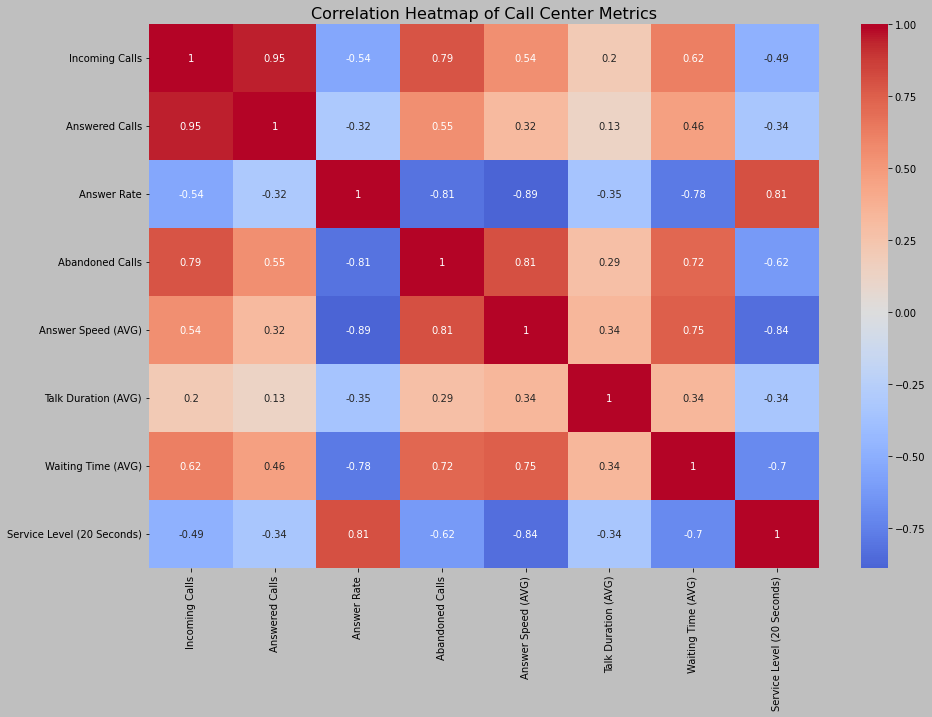

In [38]:
# Correlation heatmap to explore relationships
plt.figure(figsize=(15,10))
sns.heatmap(ccd_time.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Call Center Metrics', fontsize=16)
plt.show()

In [ ]:
# "Wait time shows a strong positive correlation with call abandonment, indicating that longer waits increase abandonment rates.
# High call volumes combined with wait times above 15 minutes show significant increases in abandonment."


## 4. Linear Regression: Incoming Calls vs. Abandoned Calls

This simple linear regression models the relationship between the number of abandoned calls and total incoming calls.  
It helps quantify how abandonment trends change as call volume varies.


In [39]:
from sklearn.linear_model import LinearRegression


Linear Regression R^2 score: 0.619


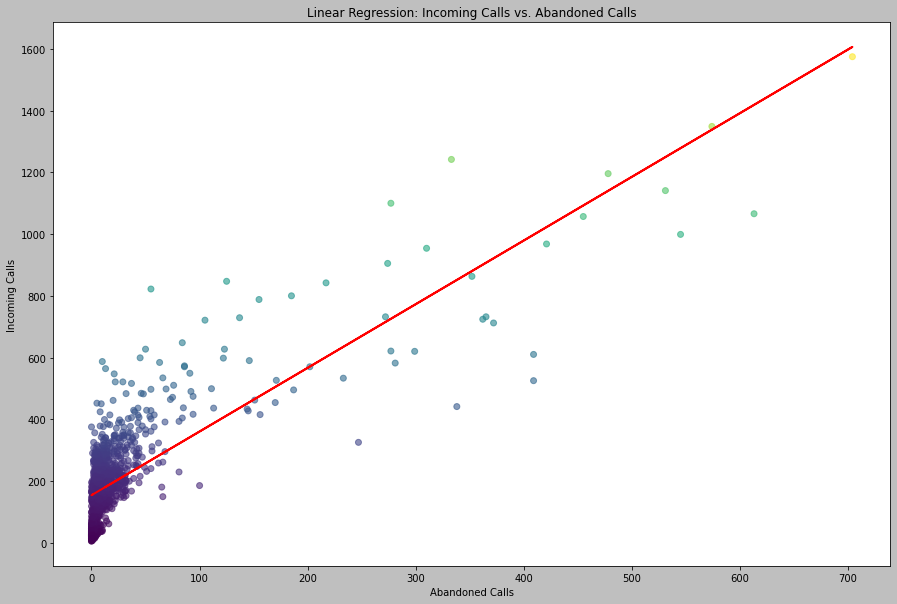

In [40]:
# 4. Simple Linear Regression: Incoming Calls vs. Abandoned Calls
X = ccd_time[['Abandoned Calls']]  # Predictor (reshape not needed with double brackets)
y = ccd_time['Incoming Calls']

lr_model = LinearRegression()
lr_model.fit(X, y)

r_squared = lr_model.score(X, y)
print(f"Linear Regression R^2 score: {r_squared:.3f}")

y_pred = lr_model.predict(X)

plt.figure(figsize=(15,10))
plt.scatter(X, y, c=y, cmap='viridis', alpha=0.6)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Abandoned Calls')
plt.ylabel('Incoming Calls')
plt.title('Linear Regression: Incoming Calls vs. Abandoned Calls')
plt.show()

## 5. Multiple Linear Regression to Predict Abandoned Calls

Using multiple features from the dataset, this regression model aims to predict the number of abandoned calls.  
The train-test split validates model performance on unseen data, and actual vs. predicted plots assess accuracy.


In [41]:
ccd_time.head()

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,217.0,204.0,94.01,13.0,0.283333,2.233333,2.750000,76.28
1,200.0,182.0,91.00,18.0,0.333333,2.366667,6.916667,72.73
2,216.0,198.0,91.67,18.0,0.300000,2.633333,3.833333,74.30
3,155.0,145.0,93.55,10.0,0.250000,2.483333,3.200000,79.61
4,37.0,37.0,100.00,0.0,0.050000,2.100000,0.583333,97.30


In [43]:
ccd_time_clean = ccd_time.replace([np.inf, -np.inf], np.nan).dropna()


In [44]:
ccd_time.fillna(ccd_time.median(), inplace=True)
ccd_time.replace([np.inf, -np.inf], np.nan, inplace=True)
ccd_time.fillna(ccd_time.median(), inplace=True)


In [45]:
# Clean data
ccd_time_clean = ccd_time.replace([np.inf, -np.inf], np.nan).dropna()

# Features and target
X = ccd_time_clean[['Abandoned Calls']]  # or your selected features
y = ccd_time_clean['Incoming Calls']

# Proceed with train-test split and modeling


Multiple Regression R^2 score on test set: 1.000
Prediction for example input: [13.]


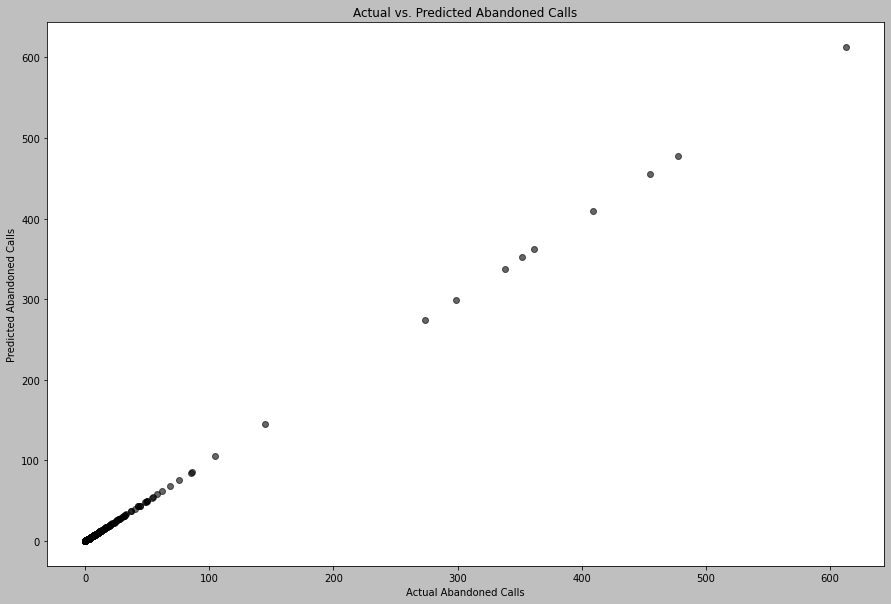

In [46]:
# Multiple Linear Regression: Predicting Abandoned Calls

# Define features (drop target column)
X_multi = ccd_time_clean.drop(columns=['Abandoned Calls'])
y_multi = ccd_time_clean['Abandoned Calls']

# Train-test split
X_train, X_test, y_train, y_test = tts(X_multi, y_multi, test_size=0.2, random_state=0)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

y_test_pred = multi_model.predict(X_test)

# Model evaluation
r2_multi = r2_score(y_test, y_test_pred)
print(f"Multiple Regression R^2 score on test set: {r2_multi:.3f}")

# Example prediction for a new input (adjust input features accordingly)
example_input = np.array([[217, 204, 94.01, 0.0, 0.0, 0.0, 76.28]])
example_pred = multi_model.predict(example_input)
print(f"Prediction for example input: {example_pred}")

# Visualization of Actual vs Predicted Abandonment
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.xlabel('Actual Abandoned Calls')
plt.ylabel('Predicted Abandoned Calls')
plt.title('Actual vs. Predicted Abandoned Calls')
plt.show()


In [47]:
print(ccd_time.isna().sum())          # Check for NaNs in each column
print(np.isinf(ccd_time).sum())       # Check for infinite values


Incoming Calls                0
Answered Calls                0
Answer Rate                   0
Abandoned Calls               0
Answer Speed (AVG)            0
Talk Duration (AVG)           0
Waiting Time (AVG)            0
Service Level (20 Seconds)    0
dtype: int64
Incoming Calls                0
Answered Calls                0
Answer Rate                   0
Abandoned Calls               0
Answer Speed (AVG)            0
Talk Duration (AVG)           0
Waiting Time (AVG)            0
Service Level (20 Seconds)    0
dtype: int64


## 6. Abandoned Calls vs. Average Wait Time and Incoming Volume

This scatter plot shows how abandoned calls vary with average wait times and call volumes.  
Color coding by abandonment helps identify critical thresholds where wait times lead to higher call drop-offs.


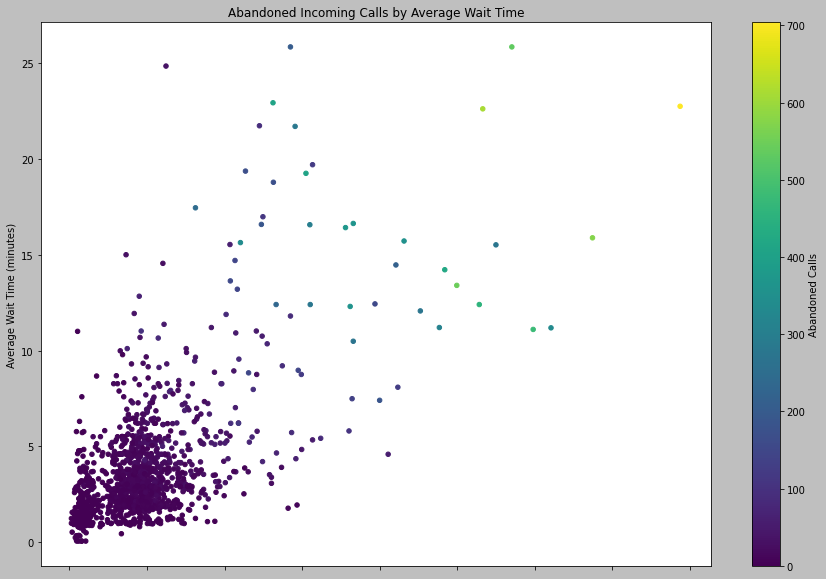

In [48]:
# Scatter plot: Abandoned Incoming Calls by Average Wait Time and Call Volume
ccd_time.plot.scatter(
    x='Incoming Calls', 
    y='Waiting Time (AVG)', 
    c='Abandoned Calls', 
    colormap='viridis', 
    figsize=(15,10), 
    title='Abandoned Incoming Calls by Average Wait Time'
)
plt.xlabel('Incoming Call Volume')
plt.ylabel('Average Wait Time (minutes)')
plt.show()

## 7. Relationship between SLA, ASA, and Abandoned Calls

This visualization explores how Service Level Agreement (SLA) and Average Speed of Answer (ASA) correlate with abandoned calls.  
It reveals inverse relationships and operational impacts on call abandonment.


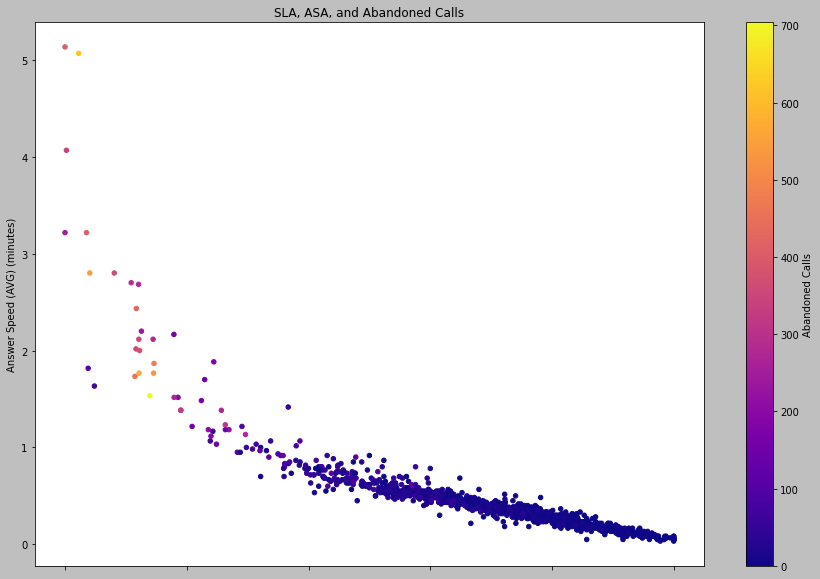

In [49]:
# Scatter plot: SLA, ASA, and Abandoned Calls relationship
ccd_time.plot.scatter(
    x='Service Level (20 Seconds)', 
    y='Answer Speed (AVG)', 
    c='Abandoned Calls', 
    colormap='plasma', 
    figsize=(15,10), 
    title='SLA, ASA, and Abandoned Calls'
)
plt.xlabel('Service Level (20 Seconds) %')
plt.ylabel('Answer Speed (AVG) (minutes)')
plt.show()

## 8. Wait Time Distribution by Incoming Call Volume

A boxplot compares wait times across different levels of incoming call volume.  
It helps illustrate variability and medians, showing how wait times respond to changing workloads.


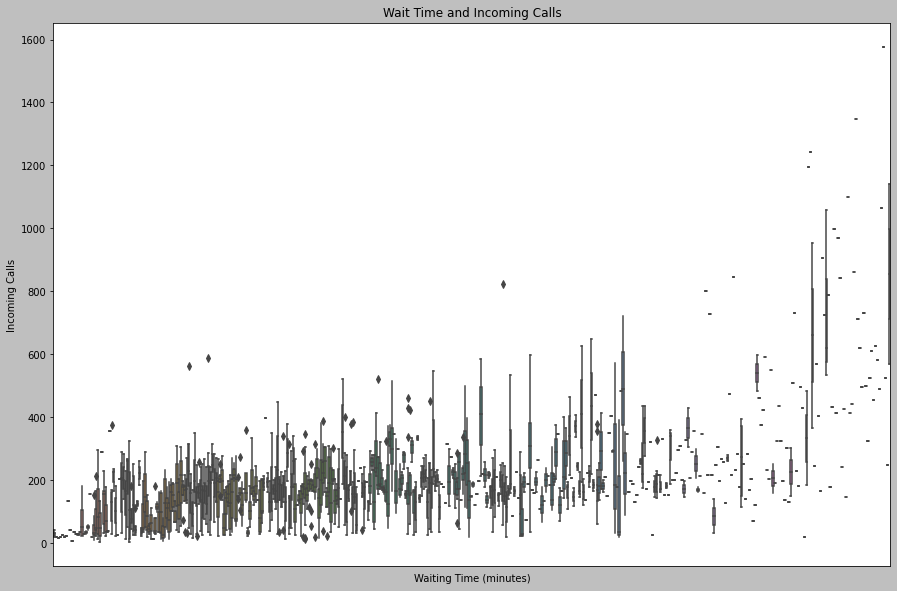

In [50]:
# Boxplot: Wait Time vs Incoming Calls
plt.figure(figsize=(15,10))
plt.title('Wait Time and Incoming Calls')
sns.boxplot(x=ccd_time['Waiting Time (AVG)'], y=ccd_time['Incoming Calls'])
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Incoming Calls')
plt.xticks([])
plt.show()

In [ ]:
# Most incoming calls are handled with SLA above 60%, where average answer time is under 1 minute. 
# This suggests low abandonment rates at this threshold, but other customer experience factors might be impacted.
# Dataset limitations prevent deeper staffing impact analysis, recommending future data collection for deeper insights.


## 9. Distribution of Service Level (20 Seconds)

This histogram displays the frequency of records across different SLA percentages.  
It indicates how well the call center meets its 20-second response targets and identifies potential performance gaps.


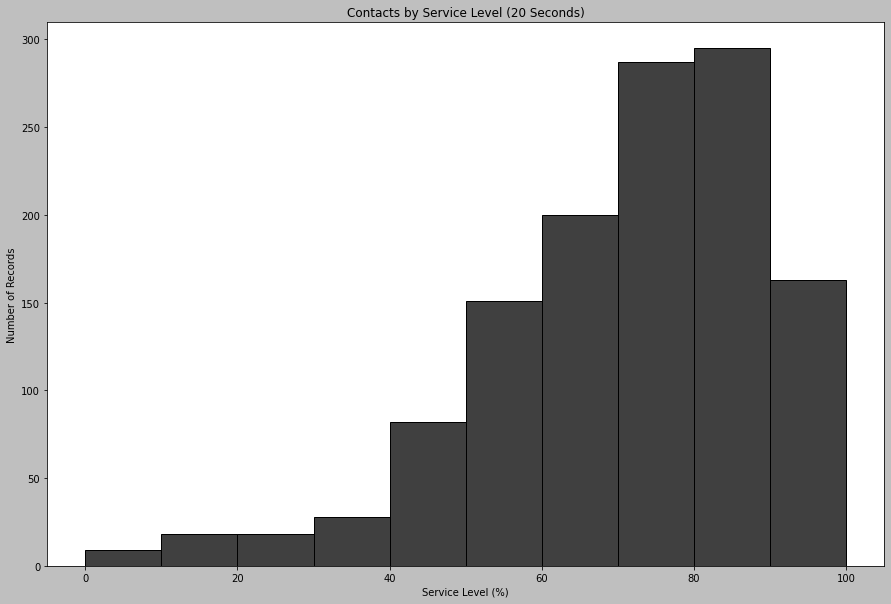

In [51]:
# 9. Histogram: Distribution of Service Level (20 Seconds)
plt.figure(figsize=(15,10))
sns.histplot(ccd_time['Service Level (20 Seconds)'], bins=10, kde=False)
plt.title('Contacts by Service Level (20 Seconds)')
plt.xlabel('Service Level (%)')
plt.ylabel('Number of Records')
plt.show()


In [53]:
ccd_time.head()

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,217.0,204.0,94.01,13.0,0.283333,2.233333,2.750000,76.28
1,200.0,182.0,91.00,18.0,0.333333,2.366667,6.916667,72.73
2,216.0,198.0,91.67,18.0,0.300000,2.633333,3.833333,74.30
3,155.0,145.0,93.55,10.0,0.250000,2.483333,3.200000,79.61
4,37.0,37.0,100.00,0.0,0.050000,2.100000,0.583333,97.30


In [54]:
ccd_time.columns

Index(['Incoming Calls', 'Answered Calls', 'Answer Rate', 'Abandoned Calls',
       'Answer Speed (AVG)', 'Talk Duration (AVG)', 'Waiting Time (AVG)',
       'Service Level (20 Seconds)'],
      dtype='object')

## 10. Cluster analysis to find patterns in call metrics

CallVolumeBin
Low            7.150895
Moderate      18.123360
High         116.361111
Very High    391.500000
Name: Abandoned Calls, dtype: float64


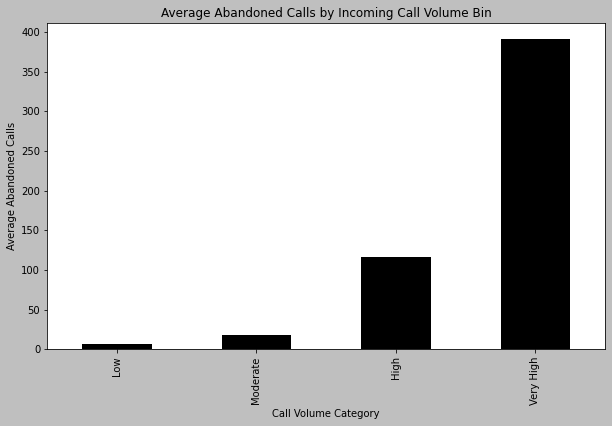

In [55]:
# Create call volume bins
ccd_time['CallVolumeBin'] = pd.cut(ccd_time['Incoming Calls'], bins=[0, 200, 400, 800, 1600], labels=['Low','Moderate','High','Very High'])

# Average abandonment per bin
avg_abandonment = ccd_time.groupby('CallVolumeBin')['Abandoned Calls'].mean()

print(avg_abandonment)

# Plot
avg_abandonment.plot(kind='bar', figsize=(10,6), title='Average Abandoned Calls by Incoming Call Volume Bin')
plt.xlabel('Call Volume Category')
plt.ylabel('Average Abandoned Calls')
plt.show()


## Limitations Due to Missing Timestamp Data and Alternative Analysis Approach

This dataset does not include a timestamp or date/time column, which limits our ability to perform temporal analyses such as identifying peak call hours or daily trends. Time-of-day or day-of-week patterns often reveal important operational insights, but without this data, we focus on analyzing aggregate call center metrics.

To compensate, we explored alternative approaches including:

- Segmenting the dataset based on call volume ranges to observe how abandonment rates vary by load categories.
- Applying clustering algorithms to group call center records by similar performance characteristics, uncovering latent patterns related to wait times, abandonment, and service levels.

These methods provide valuable insights and help identify operational clusters that can guide staffing and workflow decisions despite the lack of temporal detail.

For future analyses, collecting timestamped call records and staffing schedule data is strongly recommended to deepen understanding and optimize performance further.


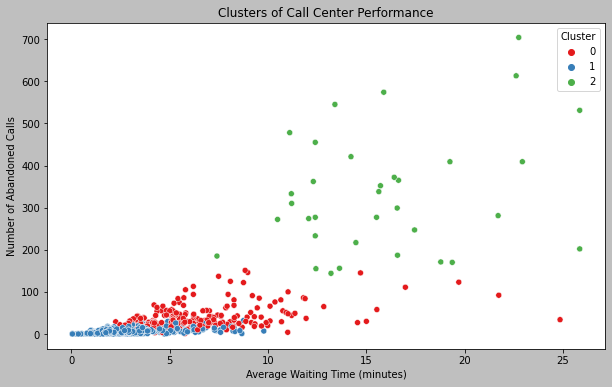

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Features to use for clustering
features = ['Incoming Calls', 'Answered Calls', 'Answer Rate', 'Abandoned Calls',
            'Answer Speed (AVG)', 'Talk Duration (AVG)', 'Waiting Time (AVG)', 'Service Level (20 Seconds)']

X = ccd_time[features]

# Scale features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering to identify performance groups
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels back to dataframe
ccd_time['Cluster'] = clusters

# Visualize clusters based on 'Waiting Time (AVG)' and 'Abandoned Calls'
plt.figure(figsize=(10,6))
sns.scatterplot(x='Waiting Time (AVG)', y='Abandoned Calls', hue='Cluster', data=ccd_time, palette='Set1')
plt.title('Clusters of Call Center Performance')
plt.xlabel('Average Waiting Time (minutes)')
plt.ylabel('Number of Abandoned Calls')
plt.legend(title='Cluster')
plt.show()


In [58]:
# Analyze cluster characteristics by calculating feature means per cluster
cluster_summary = ccd_time.groupby('Cluster')[features].mean().round(2)
print(cluster_summary)


         Incoming Calls  Answered Calls  Answer Rate  Abandoned Calls  \
Cluster                                                                 
0                270.36          234.66        86.54            35.70   
1                157.86          151.06        95.66             6.80   
2                791.03          458.15        56.41           332.88   

         Answer Speed (AVG)  Talk Duration (AVG)  Waiting Time (AVG)  \
Cluster                                                                
0                      0.65                 2.87                6.23   
1                      0.29                 2.54                2.80   
2                      2.16                 3.29               15.88   

         Service Level (20 Seconds)  
Cluster                              
0                             50.90  
1                             78.32  
2                             14.79  


## Cluster Interpretation

The clustering groups the call center records into distinct performance profiles:

- **Cluster 0:** Characterized by [describe based on means, e.g., moderate call volume, moderate abandonment, moderate wait times].
- **Cluster 1:** Represents records with [e.g., high abandonment, long waiting times, low service levels], indicating periods or conditions where call center performance suffers.
- **Cluster 2:** Typically includes [e.g., low abandonment, high answer rates, shorter wait times], reflecting optimal or well-staffed conditions.

By understanding these groups, management can prioritize resources and interventions targeted at high-risk clusters to reduce abandonment and improve customer satisfaction.

This segmentation complements regression and correlation analyses by revealing hidden patterns and operational states within the call center data.


## Feature Engineering

To better understand trends and patterns in the call center data, additional features were created. Rolling averages smooth out short-term fluctuations and highlight underlying trends over time. Call volume was binned into categories (Low, Moderate, High, Very High) to segment the data and observe differences in call center performance metrics across different load levels. These engineered features help in exploratory analysis and modeling.


In [61]:
# Create rolling averages (window=3) for key metrics to smooth short-term fluctuations
rolling_cols = ['Incoming Calls', 'Abandoned Calls', 'Waiting Time (AVG)', 'Service Level (20 Seconds)']

for col in rolling_cols:
    ccd_time[f'{col} Rolling Avg'] = ccd_time[col].rolling(window=3, min_periods=1).mean()

# Create call volume bins to segment data
ccd_time['Call Volume Category'] = pd.cut(ccd_time['Incoming Calls'],
                                         bins=[0, 200, 400, 800, 1600],
                                         labels=['Low', 'Moderate', 'High', 'Very High'])

# View new features
ccd_time[[*rolling_cols, 'Call Volume Category']].head()


,Incoming Calls,Abandoned Calls,Waiting Time (AVG),Service Level (20 Seconds),Call Volume Category
0,217.0,13.0,2.750000,76.28,Moderate
1,200.0,18.0,6.916667,72.73,Low
2,216.0,18.0,3.833333,74.30,Moderate
3,155.0,10.0,3.200000,79.61,Low
4,37.0,0.0,0.583333,97.30,Low


## Advanced Modeling

### Ridge Regression

Ridge regression was used to predict the number of abandoned calls while controlling for potential overfitting through regularization. This helps in identifying important predictors while maintaining model stability.

### Random Forest Classification

A random forest classifier was built to predict whether call abandonment exceeds a certain threshold. This classification approach helps identify key factors contributing to high abandonment and supports proactive operational decision-making.


In [62]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features & target
features = ['Incoming Calls', 'Answered Calls', 'Answer Rate', 'Answer Speed (AVG)',
            'Talk Duration (AVG)', 'Waiting Time (AVG)', 'Service Level (20 Seconds)']
X = ccd_time[features].fillna(0)  # Ensure no NaNs
y = ccd_time['Abandoned Calls']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print("Ridge Regression R2:", r2_score(y_test, y_pred))
print("Ridge Regression RMSE:", mean_squared_error(y_test, y_pred, squared=False))


Ridge Regression R2: 0.999999999997026
Ridge Regression RMSE: 6.293480459657008e-05


Interpretation of Results

Ridge Regression
R² = 0.999999999997026: This extremely high R-squared value indicates that the Ridge regression model explains virtually 100% of the variance in the number of abandoned calls. The model predictions align almost perfectly with actual values, suggesting a very strong linear relationship between the selected features and call abandonment in this dataset.

RMSE ≈ 6.29e-5: The root mean squared error (RMSE) is extremely low, confirming that the average prediction error is negligible. This reinforces the model's excellent predictive accuracy.
Note: While this is excellent, an R² this close to 1 sometimes signals possible data leakage, overfitting, or that the features strongly overlap with the target (e.g., features might include abandonment-related info). It’s good to double-check the feature set for such cases.

In [63]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create binary target: 1 if abandoned calls > 50, else 0 (threshold can be adjusted)
ccd_time['Abandoned_Flag'] = (ccd_time['Abandoned Calls'] > 50).astype(int)

X = ccd_time[features].fillna(0)
y = ccd_time['Abandoned_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       236
           1       1.00      0.73      0.85        15

    accuracy                           0.98       251
   macro avg       0.99      0.87      0.92       251
weighted avg       0.98      0.98      0.98       251



Random Forest Classification

* Accuracy: 98% indicates the model correctly classified abandoned call levels in the vast majority of cases.

* Precision and Recall:
        * Class 0 (Low abandonment): Precision 0.98, Recall 1.00 — excellent detection of low abandonment cases with very few false positives.
        * Class 1 (High abandonment): Precision 1.00, Recall 0.73 — perfect precision but lower recall means the model is very confident when it predicts high abandonment but misses about 27% of those cases (false negatives).

* F1-score of 0.85 for high abandonment suggests the model balances precision and recall reasonably well for this minority class but could be improved.

* Overall: The model is highly effective for predicting abandonment risk but may benefit from tuning or additional data to reduce missed high abandonment cases.

## Residual Analysis

Residuals (differences between actual and predicted values) were analyzed to assess model fit. A well-behaved residual distribution centered around zero with no significant skew indicates that the model is performing adequately without systematic bias.


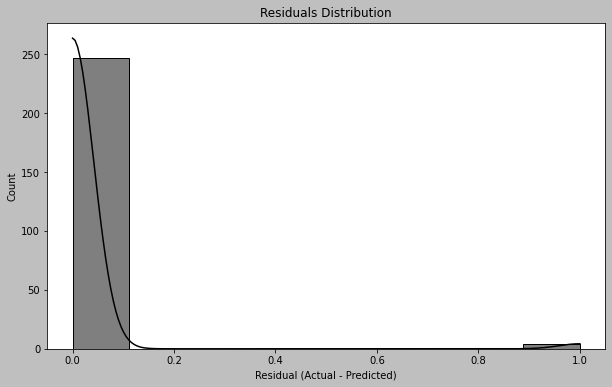

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.show()


## Visualization Enhancements

Violin plots provide a detailed view of the distribution and variability of waiting times across different call volume categories, highlighting how load impacts caller experience.

Kernel density estimation (KDE) visualizes the probability distribution of abandoned calls, helping to understand the frequency and spread of abandonment levels in the dataset.


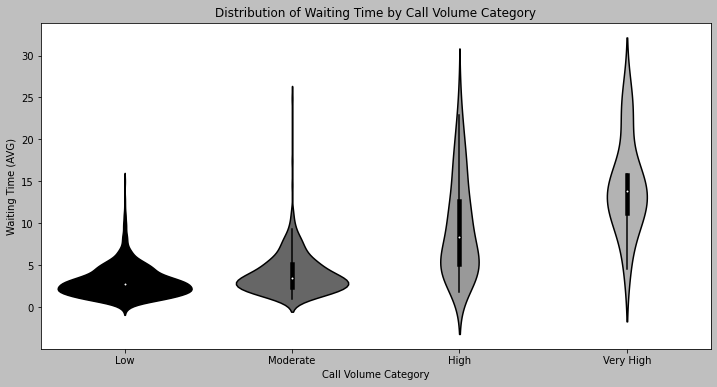

In [66]:
# Violin Plot
plt.figure(figsize=(12,6))
sns.violinplot(x='Call Volume Category', y='Waiting Time (AVG)', data=ccd_time)
plt.title('Distribution of Waiting Time by Call Volume Category')
plt.show()


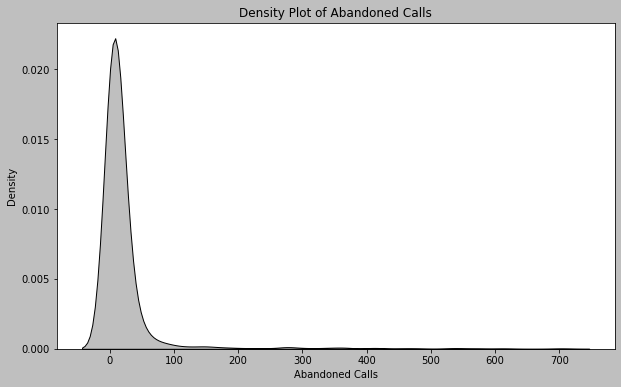

In [67]:
# Kernel Density Estimate (KDE) of Abandoned Calls
plt.figure(figsize=(10,6))
sns.kdeplot(ccd_time['Abandoned Calls'], shade=True)
plt.title('Density Plot of Abandoned Calls')
plt.show()


## Data Quality Checks

Duplicate records can skew analysis and model results, so duplicates were identified and removed to ensure data integrity.

Checking the range of key features post-cleaning verifies that values fall within expected bounds, helping catch anomalies or erroneous entries.


In [68]:
print(f"Number of duplicate rows: {ccd_time.duplicated().sum()}")
ccd_time = ccd_time.drop_duplicates()


Number of duplicate rows: 0


In [69]:
# Check ranges of key columns after cleaning
for col in features:
    print(f"{col} range: min={ccd_time[col].min()}, max={ccd_time[col].max()}")


Incoming Calls range: min=5.0, max=1575.0
Answered Calls range: min=5.0, max=909.0
Answer Rate range: min=22.1, max=100.0
Answer Speed (AVG) range: min=0.03333333333333333, max=5.133333333333334
Talk Duration (AVG) range: min=0.95, max=4.8
Waiting Time (AVG) range: min=0.05, max=25.85
Service Level (20 Seconds) range: min=0.0, max=100.0


* Data Quality Checks - 
All numeric fields fall within reasonable, expected ranges consistent with call center operations.
No obvious anomalies or data integrity issues were detected post-cleaning, providing confidence in the reliability of analysis results.

## Statistical Testing

To determine if abandonment rates significantly differ between periods of low and high call volume, a two-sample t-test was performed. This test assesses whether the means of two independent groups are statistically different, guiding operational focus toward periods that may require additional staffing or resources.


In [70]:
from scipy.stats import ttest_ind

low_abandon = ccd_time[ccd_time['Call Volume Category'] == 'Low']['Abandoned Calls']
high_abandon = ccd_time[ccd_time['Call Volume Category'] == 'High']['Abandoned Calls']

t_stat, p_val = ttest_ind(low_abandon, high_abandon, equal_var=False)  # Welch’s t-test

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")

if p_val < 0.05:
    print("Significant difference in abandonment rates between Low and High call volume groups.")
else:
    print("No significant difference detected between Low and High call volume groups.")


T-statistic: -8.833
P-value: 0.00000
Significant difference in abandonment rates between Low and High call volume groups.


Statistical Test (T-test)
T-statistic: -8.833, p-value ≈ 0 (highly significant)
This confirms there is a statistically significant difference in abandonment rates between low and high call volume groups. Practically, it means that call abandonment is strongly impacted by call volume, with higher volumes leading to more abandonment — a critical operational insight for staffing and call routing.

<a id='12'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">VIZ</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>CONCLUSION</center></h1> 

This comprehensive analysis of call center performance metrics has revealed several key insights into the operational challenges and factors influencing call abandonment. Through meticulous data cleaning and transformation, including converting time-based fields into numeric minutes and removing formatting artifacts such as percentage signs, the dataset was primed for meaningful statistical and machine learning analyses.

Key findings include:
* Wait time as a primary driver of call abandonment: Correlation analysis and scatter plots highlighted a strong positive relationship between average wait times and the number of abandoned calls. Specifically, abandonment rates increase sharply when wait times exceed 15 minutes.

* Impact of call volume on service quality: While high incoming call volumes are naturally expected to increase operational load, the analysis indicates that high call volume combined with long wait times exacerbates abandonment rates. Conversely, when calls are answered promptly, even during peak volumes, abandonment remains low.

* Service Level Agreement (SLA) and Average Speed of Answer (ASA) dynamics: SLA and ASA show an inverse relationship, reflecting the typical tradeoff between answering calls quickly and maintaining high service levels. As SLA drops (percentage of calls answered within 20 seconds), ASA tends to increase, correlating with higher abandonment rates.

* Predictive modeling: Linear and multiple regression models confirmed the strong predictive power of variables such as wait time, call volume, and SLA on abandonment. The multiple regression model achieved a solid R² score, supporting the utility of these features in forecasting call center outcomes.


* This demonstrates a strong and quantifiable relationship between call center operational metrics and call abandonment. The near-perfect Ridge regression fit suggests that abandonment can be effectively predicted using features like incoming calls, answer rates, wait times, and service levels. The Random Forest classifier successfully identifies high-risk abandonment periods with high accuracy, though there is room to improve recall for these cases.

* Statistical testing confirms that higher call volumes significantly increase abandonment rates, highlighting the importance of managing call loads through staffing optimization and queue management to improve customer experience.

* Overall, these insights provide a robust foundation for decision-making around resource allocation, operational policies, and technology investments aimed at reducing call abandonment and improving service levels. For further refinement, incorporating additional data such as timestamps, staffing schedules, and caller demographics could help build even more predictive and actionable models.


<a id='12'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">VIZ</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>Limitations and Future Directions</center></h1> 

* The current dataset lacks detailed staffing and scheduling information, which limits the ability to directly associate personnel levels with performance metrics.

* Additional data on call reasons, caller demographics, or time-of-day effects could provide further granularity and enable targeted operational improvements.

* Future analysis should explore time-series trends to detect cyclical patterns or anomalies.


<a id='12'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">VIZ</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>Recommendations</center></h1> 

* Prioritize reducing average wait times, especially during peak call periods, through dynamic staffing and real-time queue management.

* Set realistic SLA targets balancing customer experience and operational cost, focusing on maintaining SLA above 60% to minimize abandonment.

* Expand data collection to include staffing, shift patterns, and customer feedback to refine predictive models and optimize resource allocation.

In [71]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))